# Regression Metrics and Plot

We won't be creating model. We will generate some random value which will be treated as actual value, and add some noise in it for predicted value. 

In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
##Actual value
y_act=np.random.random_sample(100)*10

In [3]:
#Predicetd value
y_pred=y_act+np.random.uniform(-3,2,100)

In [4]:
#MAE
mean_absolute_error(y_act,y_pred)

1.3669744345692507

In [5]:
#MSE
mean_squared_error(y_act,y_pred)

2.460760639355744

In [6]:
#RMSE
np.sqrt(mean_squared_error(y_act,y_pred))

1.5686811783647256

In [7]:
#R2
r2_score(y_act,y_pred)

0.7157850604661651

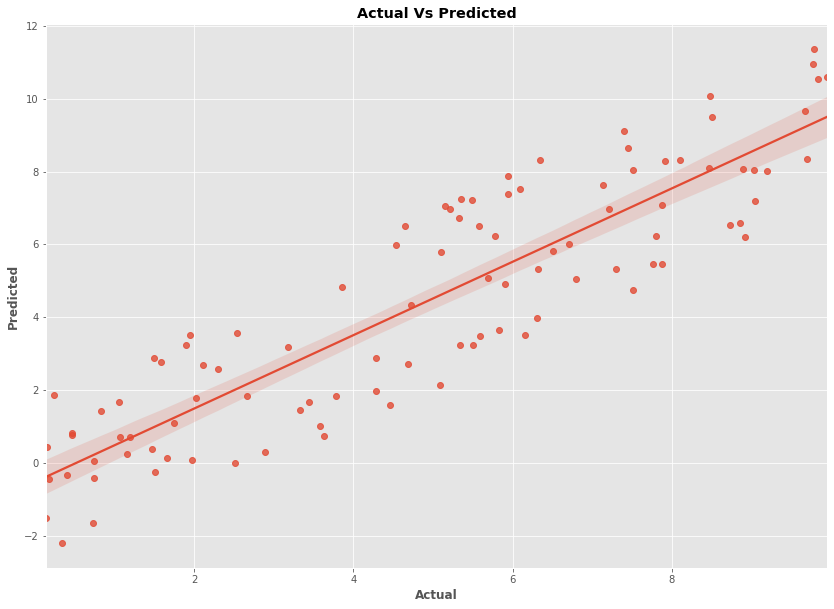

In [8]:
fig, ax = plt.subplots(figsize=(14,10))
plt.xlabel('Actual',fontweight='bold')
plt.ylabel('Predicted',fontweight='bold')
plt.title('Actual Vs Predicted',fontweight='bold')
sns.regplot(x=y_act, y=y_pred);

# CLASSIFICATION METRICS

We will start with binary and then we will show multi class.

In [9]:
#CREATING ML MODELS
from sklearn.metrics import roc_auc_score,precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix,matthews_corrcoef

In [10]:
Y_act=np.random.randint(2, size=100)
Y_pred=np.random.randint(2, size=100)

In [11]:
cnf_matrix = confusion_matrix(Y_act,Y_pred)

<AxesSubplot:>

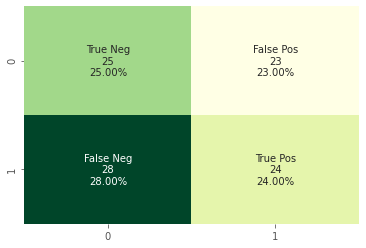

In [12]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='YlGn',cbar=False)

In [13]:
precision_score(Y_act,Y_pred)

0.5106382978723404

In [14]:
recall_score(Y_act,Y_pred)

0.46153846153846156

In [15]:
f1_score(Y_act,Y_pred)

0.48484848484848486

In [16]:
accuracy_score(Y_act,Y_pred)

0.49

In [17]:
matthews_corrcoef(Y_act,Y_pred)

-0.017645888155149142

# 
<b>FOR ROC & AUC MODEL IS REQUIRED

In [18]:
from sklearn import datasets
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [20]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

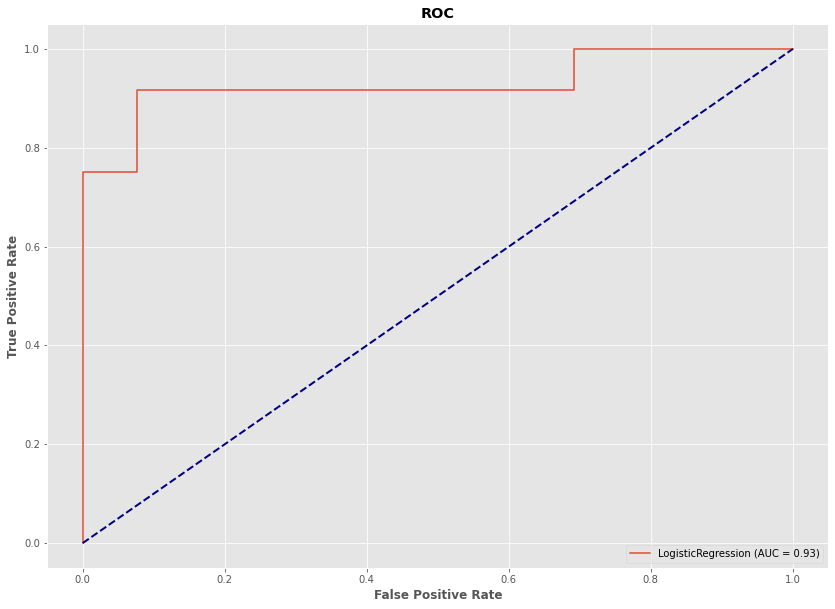

In [21]:
fig, ax = plt.subplots(figsize=(14,10))
plot_roc_curve(clf, X_test, y_test,ax=ax)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',fontweight='bold')
plt.ylabel('True Positive Rate',fontweight='bold')
plt.title('ROC',fontweight='bold')
plt.show()

# MULTI-CLASS

In [22]:
Y_true=np.random.randint(3, size=400)
Y_predc=np.random.randint(3, size=400)

In [23]:
cnf_matrix_mcls = confusion_matrix(Y_true,Y_predc)

<AxesSubplot:>

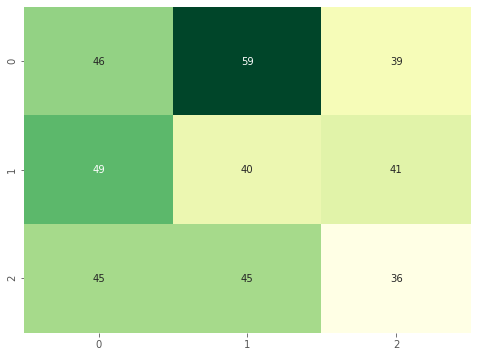

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cnf_matrix_mcls, annot=True,cmap='YlGn',cbar=False)

In [25]:
#For each Class
recall = np.diag(cnf_matrix_mcls) / np.sum(cnf_matrix_mcls, axis = 1)
precision = np.diag(cnf_matrix_mcls) / np.sum(cnf_matrix_mcls, axis = 0)
print (recall, precision)

[0.31944444 0.30769231 0.28571429] [0.32857143 0.27777778 0.31034483]


In [26]:
#Average Precision
precision_score(Y_true,Y_predc,average='micro')

0.305

In [27]:
#Average Recall
precision_score(Y_true,Y_predc,average='micro')

0.305

In [28]:
accuracy_score(Y_true,Y_predc)

0.305